# ***LAB 10 : Naive Bayes Classifier***##

  1. Binary Classification using Naive Bayes Classifier
  
  2. Sentiment Analysis using Naive Bayes

  


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from math import pi
from math import exp
import seaborn as sns

## Binary Classification using Naive Bayes Classifier##

Useful References : 
1. https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/

2. https://www.analyticsvidhya.com/blog/2021/01/a-guide-to-the-naive-bayes-algorithm/

3. https://towardsdatascience.com/implementing-naive-bayes-algorithm-from-scratch-python-c6880cfc9c41

**Note : The goal of this experiment is to perform and understand Naive Bayes classification by applying it on the below dataset, you can either fill in the below functions to get the result or you can create a class of your own using the above references to perform classification**

1. Generation of 2D training data

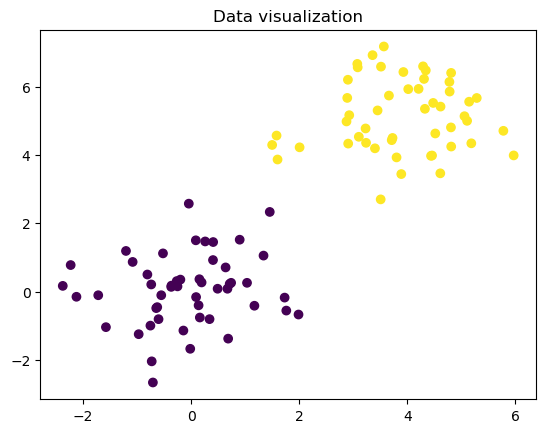

In [2]:
mean1=np.array([0,0])
mean2=np.array([4,5])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,50)
data2=np.random.multivariate_normal(mean2,var,50)
data=np.concatenate((data1,data2))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')
plt.show()

2. Split the Dataset by Class Values (Create a Dictionary)

In [3]:
def class_dictionary(data,label):
  class_dict = {}
  ## Write your code here
  array1=[]
  array2=[]
  for i in range(len(data)):
    if label[i]==0:
      array1.append(data[i])
    else:
      array2.append(data[i])
  class_dict={0:array1,1:array2}
  return class_dict

print(class_dictionary(data,label))

{0: [array([-1.57668985, -1.03982262]), array([-2.22908837,  0.77738534]), array([-0.72944014, -2.04059601]), array([-0.60307093, -0.80613793]), array([-0.1988887,  0.351987 ]), array([-1.0823819 ,  0.86873075]), array([-0.64602276, -0.4827786 ]), array([-0.55301333, -0.10534224]), array([-0.97041435, -1.24566304]), array([ 0.34076762, -0.80512206]), array([1.45488724, 2.3318086 ]), array([-0.14322361, -1.13894247]), array([-0.70767693, -2.65891323]), array([ 0.09163132, -0.15950217]), array([-2.12241532, -0.15106366]), array([-0.36859122,  0.13876704]), array([ 1.9871582 , -0.67035913]), array([0.15313648, 0.36290063]), array([-1.71898891, -0.10582707]), array([0.49004011, 0.08445841]), array([ 1.73020468, -0.1749493 ]), array([-0.04321608,  2.57402376]), array([0.67183735, 0.084099  ]), array([0.40754152, 1.45065429]), array([1.3396092 , 1.05418816]), array([0.40455369, 0.92363786]), array([ 1.17081537, -0.41316892]), array([-0.26643325,  0.30823425]), array([-0.25223481,  0.15357382

3. Calculate Mean, Std deviation and count for each column in a dataset

In [4]:
# class_dict=class_dictionary(data,label)
# # print(class_dict[0])
# mn=np.mean(class_dict[0],axis=0)
# std=np.std(class_dict[0],axis=0)
# # print(np.shape(class_dict[0]))
# print(mn,std)

In [5]:
def get_variables(class_dict):
  var_dict = {}
  ## Write your code here
  # print(class_dict.keys())
  len_0=len(class_dict[0])
  len_1=len(class_dict[1])
  dict_mean0=np.mean(class_dict[0],axis=0)
  dict_mean1=np.mean(class_dict[1],axis=1)
  dict_std0=np.std(class_dict[0],axis=0)
  dict_std1=np.std(class_dict[1],axis=1)
  var_dict={0:[(dict_mean0[0],dict_std0[0],len_0),(dict_mean0[1],dict_std0[1],len_0)],1:[(dict_mean1[0],dict_std1[0],len_1),(dict_mean1[1],dict_std1[1],len_1)]}
  return var_dict
class_dict=class_dictionary(data,label)
var=get_variables(class_dict)
print(var)

{0: [(-0.08143074021616499, 0.9927104621843587, 50), (0.05650317153356914, 1.0255393627439437, 50)], 1: [(3.1034180649518266, 0.404104263401742, 50), (5.442216892364764, 1.1502910809817517, 50)]}


3. Calculate Class Probabilities

In [6]:
def calculate_probability(x,mean,stdev):
  exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
  return (1 / (sqrt(2 * pi) * stdev)) * exponent

def calculate_class_probabilities(summaries,row):
  probabilities = dict()

  ## Write your code here to calculate the class probabilities
  '''
  You can use the above function (calculate_probability) to calculate probability of an individual data point belonging to a particular class 
  based on mean and std deviation of that class
  '''
  total_rows=np.sum([summaries[label][0][2] for label in summaries])
  # print(total_rows)
  for cls,cls_var in summaries.items():
    probabilities[cls] = summaries[cls][0][2]/float(total_rows)
    for i in range(len(cls_var)):
      mean, stdev, _ = cls_var[i]
      probabilities[cls] *= calculate_probability(row[i], mean, stdev)
  return probabilities

4. Test the model using some samples

Test Data Size :  20


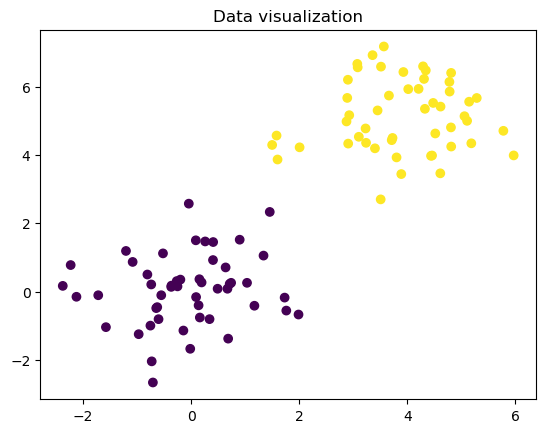

In [9]:
## Test Data Generation

mean1=np.array([0,0])
mean2=np.array([4,5])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,10)
data2=np.random.multivariate_normal(mean2,var,10)
test_data=np.concatenate((data1,data2))
y_test=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))
print('Test Data Size : ',test_data.shape[0])
plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')
plt.show()

Testing for a sample point

In [10]:
class_dict = class_dictionary(data,label)
var_dict = get_variables(class_dict)
out = calculate_class_probabilities(var_dict,test_data[0])
print('Class Probabilites for the first sample of test dataset : ')
print(out)

Class Probabilites for the first sample of test dataset : 
{0: 0.014197204018409897, 1: 1.6298869947734597e-37}


**As seen above the class probability for the 1st sample is given, we can observe that probability is higher for class 0 than 1 and hence imply that this datapoint belongs to class 0**


Now Calculate the class probabilities for all the data points in the test dataset and calculate the accuracy by comparing the predicted labels with the true test labels


In [11]:
## Write your code here
out=[]
y_pred=[]
count=0
for i in range(len(test_data)):
  out.append(calculate_class_probabilities(var_dict,test_data[i])) 
  if out[i][0]>out[i][1]:
    y_pred.append(0)
  else:
    y_pred.append(1)
for i in range(len(y_pred)):
  if y_pred[i]==y_test[i]:
    count+=1
accuracy=count/len(y_pred)
print('\n Accuracy is : ',accuracy)    


 Accuracy is :  1.0


5. Use the Sci-kit Learn library to perform Gaussian Naive Bayes classifier on the above dataset, also report the accuracy and confusion matrix for the same


 Accuracy :  1.0


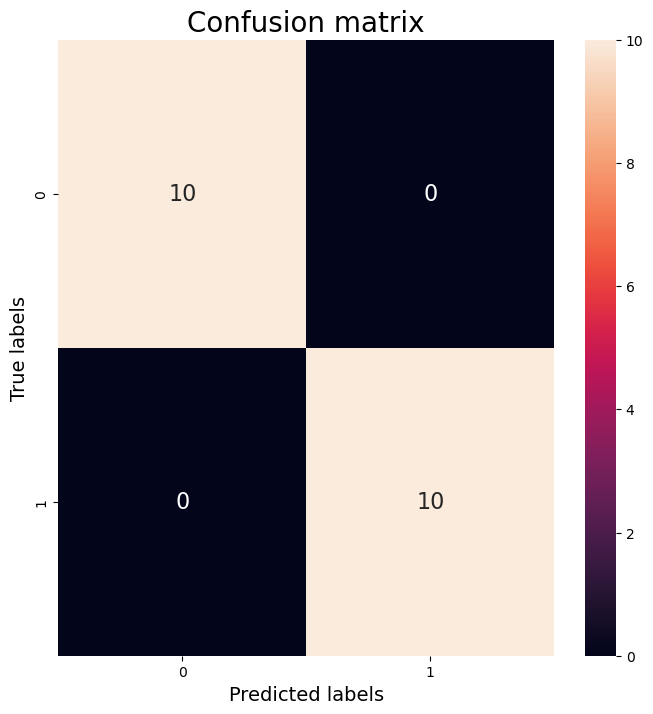

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
## Write your code here
gnb=GaussianNB()
gnb.fit(data,label)
y_pred=gnb.predict(test_data)
accuracy=gnb.score(test_data,y_pred)
cm=confusion_matrix(y_test,y_pred)
print('\n Accuracy : ',accuracy)

y_pred=gnb.predict(test_data)

cm=confusion_matrix(y_test,y_pred)


fig= plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,annot_kws={"size":16},fmt="d")
plt.xlabel("Predicted labels",fontsize=14)
plt.ylabel("True labels",fontsize=14)
plt.title("Confusion matrix",fontsize=20)
plt.show()

## Sentiment Analysis using Naive Bayes Classifier##

Go through the following [article](https://www.analyticsvidhya.com/blog/2021/07/performing-sentiment-analysis-with-naive-bayes-classifier/) and implement the same 

**Keypoints** : 
  
  1. The link to the dataset is given in the above article, download the same to perform sentiment analysis

  2. Understanding how to deal with text data is very important since it requires a lot of preprocessing, you can go through this [article](https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/) if you are interested in learning more about it
  
  3. Split the dataset into train-test and train the model
  
  4. Report the accuracy metrics and try some sample prediction outside of those present in the dataset


**Note : The goal of this experiment is to explore a practical use case of Naive bayes classifier as well as to understand how to deal with textual data, you can follow any other open source implemetations of sentiment analysis using naive bayes also**

Other References : 

1. https://towardsdatascience.com/sentiment-analysis-introduction-to-naive-bayes-algorithm-96831d77ac91

2. https://gist.github.com/CateGitau/6608912ca92733036c090676c61c13cd

In [13]:
# from google.colab import drive
# drive.mount('/content/drive')

In [14]:
import pandas as pd

## Write your code here
data=pd.read_csv('./lab_files/Lab_10/review.csv')

In [15]:
data.head()


,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [16]:
def preprocess_data(data):
    # Remove package name as it's not relevant
    data = data.drop('package_name', axis=1)
    
    # Convert text to lowercase
    data['review'] = data['review'].str.strip().str.lower()
    return data

In [17]:
data = preprocess_data(data)

In [18]:
from sklearn.model_selection import train_test_split
# Split into training and testing data
x = data['review']
y = data['polarity']
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
# Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english')
x_train = vec.fit_transform(x_train).toarray()
x_test = vec.transform(x_test).toarray()


 Accuracy :  0.8565022421524664
[1]
[0]


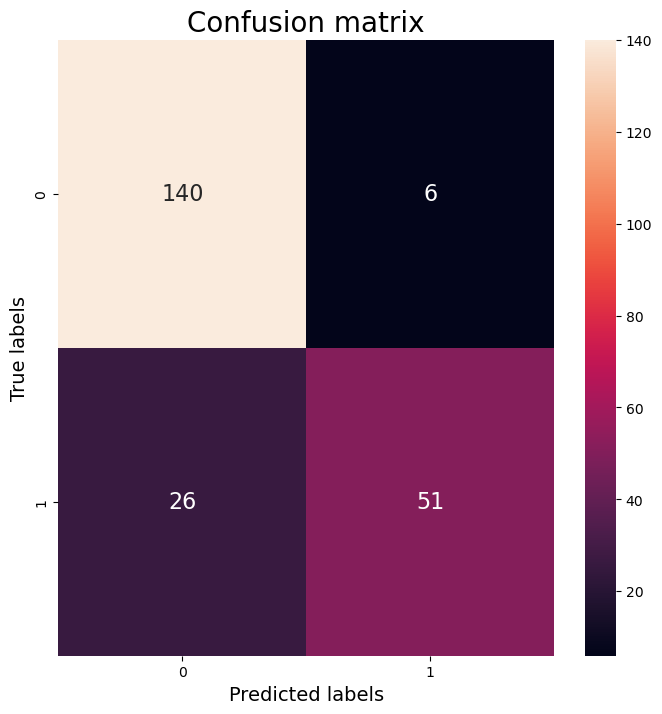

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import seaborn as sns

model = MultinomialNB()
model.fit(x_train, y_train)
acc=model.score(x_test, y_test)
print('\n Accuracy : ',acc)
print(model.predict(vec.transform(['Love this app simply awesome!'])))
print(model.predict(vec.transform(['The app is very bad and took long time to run.'])))
y_pred=model.predict(x_test)

cm=confusion_matrix(y_test,y_pred)


fig= plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,annot_kws={"size":16},fmt="d")
plt.xlabel("Predicted labels",fontsize=14)
plt.ylabel("True labels",fontsize=14)
plt.title("Confusion matrix",fontsize=20)
plt.show()


 Accuracy :  0.8071748878923767
[1]
[1]


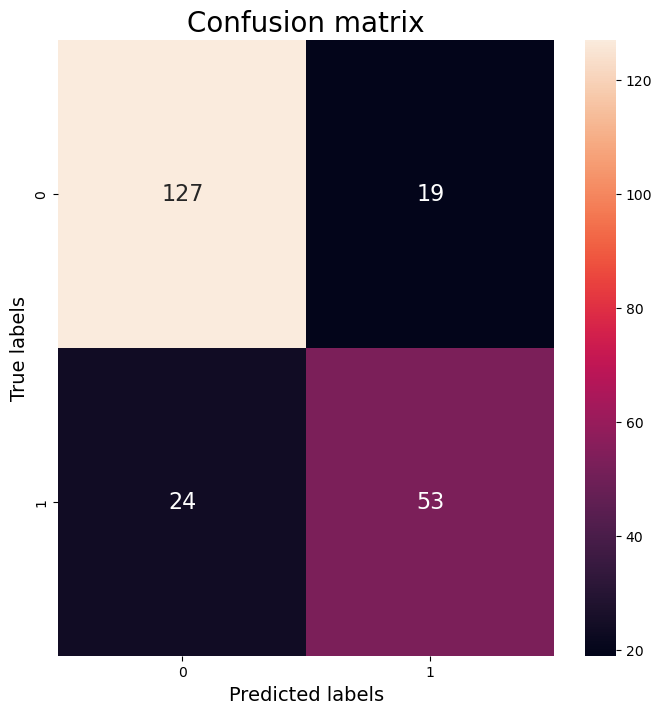

In [21]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)
acc=model.score(x_test, y_test)
print('\n Accuracy : ',acc)
print(model.predict(vec.transform(['Love this app simply awesome!']).toarray()))
print(model.predict(vec.transform(['The app is very bad and took long time to run.']).toarray()))

y_pred=model.predict(x_test)

cm=confusion_matrix(y_test,y_pred)


fig= plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,annot_kws={"size":16},fmt="d")
plt.xlabel("Predicted labels",fontsize=14)
plt.ylabel("True labels",fontsize=14)
plt.title("Confusion matrix",fontsize=20)
plt.show()


 Accuracy :  0.7668161434977578
[1]
[0]


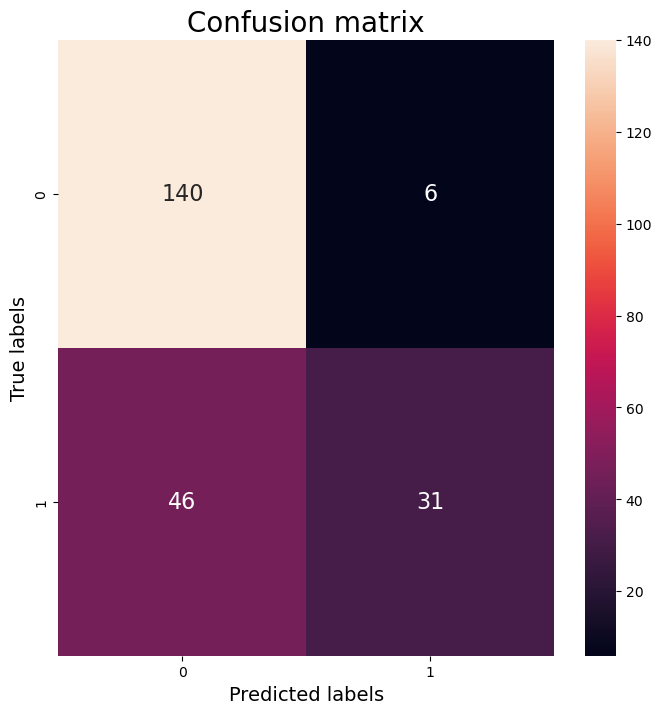

In [22]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(x_train, y_train)
acc=model.score(x_test, y_test)
print('\n Accuracy : ',acc)
print(model.predict(vec.transform(['Love this app simply awesome!'])))
print(model.predict(vec.transform(['The app is very bad and took long time to run.'])))
y_pred=model.predict(x_test)

cm=confusion_matrix(y_test,y_pred)


fig= plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,annot_kws={"size":16},fmt="d")
plt.xlabel("Predicted labels",fontsize=14)
plt.ylabel("True labels",fontsize=14)
plt.title("Confusion matrix",fontsize=20)
plt.show()